In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from PIL import Image
import requests

In [42]:
casc = cv2.CascadeClassifier("/kaggle/input/vehicle/HaarCascadeClassifier.xml")

In [7]:
def changetogray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [74]:
def annotated_vehicle(img_arr):
    #img = changetogray(img)
    #casc = cv2.CascadeClassifier("/kaggle/input/vehicle/HaarCascadeClassifier.xml")
    global count
    vehicles = casc.detectMultiScale(img_arr, 1.3, 3)
    for (x, y, w, h) in vehicles:
        count += 1
        cv2.rectangle(img_arr, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    return img_arr

Number of Vehicles:  19


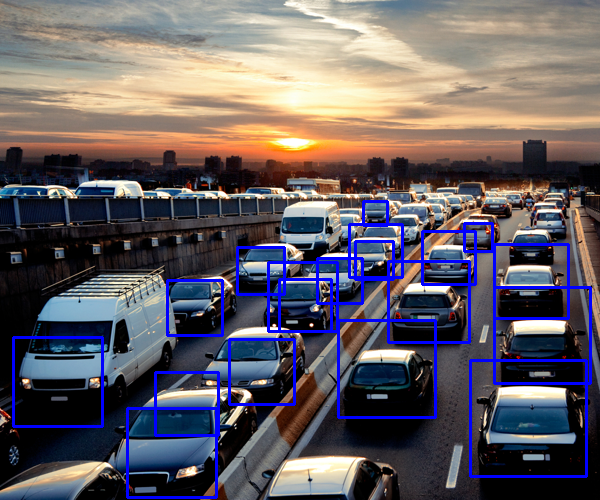

In [77]:
#pic = cv2.imread("https://images.template.net/wp-content/uploads/2016/04/27093503/Sky-Blue-Colored-Car-Wallpaper-for-Download.jpg")
#image = Image.open(requests.get("https://www.superiorwallpapers.com/cars/beautiful-infinity-black-car-on-the-road-autumn-season_3840x2160.jpg", stream=True).raw)
image = Image.open(requests.get("https://santanderconsumerusa.com/wp-content/uploads/2014/06/06-16-scusa-most-ever-light-vehicles-ihs-auto.jpg", stream=True).raw)
image = image.resize((600,500))
image_arr = np.array(image)
image
count = 0
annotated_vehicle(image_arr)
print("Number of Vehicles: ", count)
Image.fromarray(image_arr)


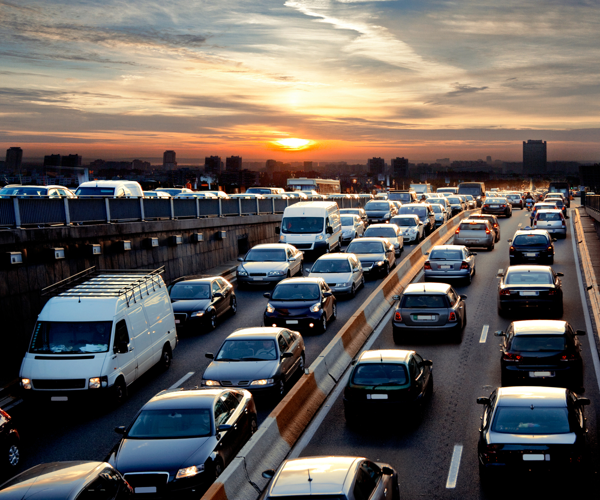

In [79]:
image = Image.open(requests.get("https://santanderconsumerusa.com/wp-content/uploads/2014/06/06-16-scusa-most-ever-light-vehicles-ihs-auto.jpg", stream=True).raw)
image = image.resize((600,500))
image_arr = np.array(image)
image

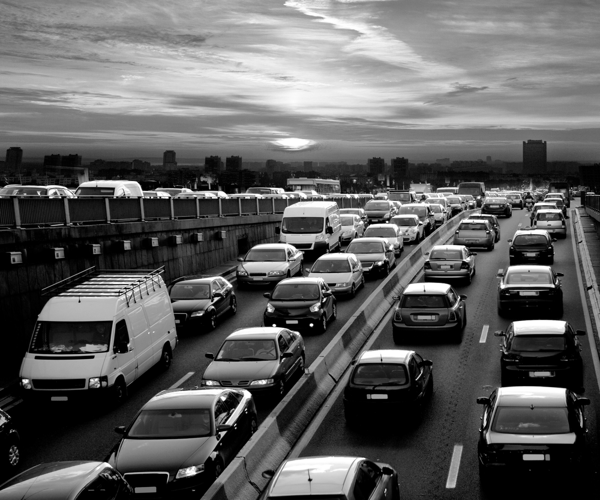

In [80]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

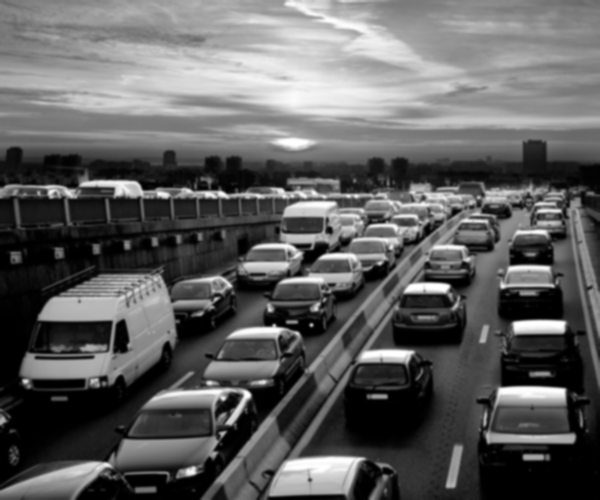

In [81]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

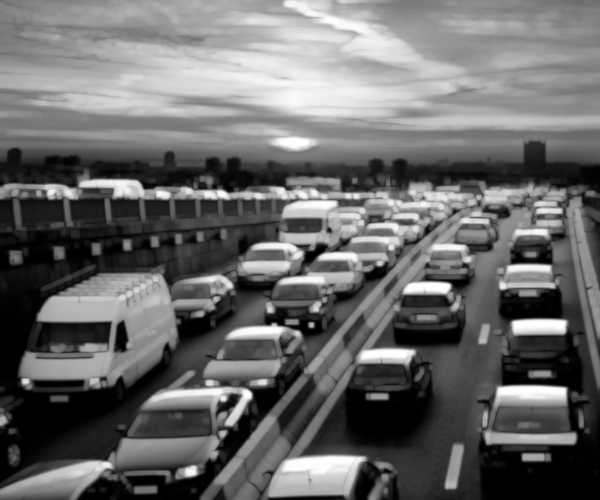

In [82]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

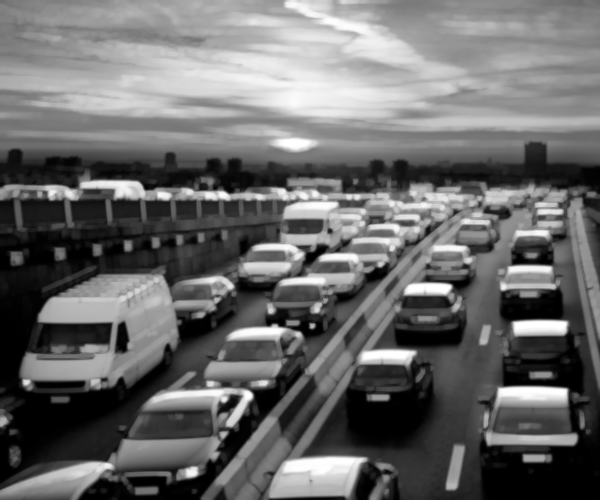

In [83]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [85]:
contours,h = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(frame1,contours,-1,(0,0,255),2)

AttributeError: 'tuple' object has no attribute '__array_interface__'